In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# create a set of random latitude and longitude Combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
len(coordinates)

1500

In [4]:
from citipy import citipy

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


karratha au
new norfolk au
hilo us
souillac mu
jamestown sh
umzimvubu za
tibu co
port alfred za
krasnoselkup ru
busselton au
mehran ir
altamira br
punta arenas cl
vaini to
tasiilaq gl
cidreira br
rikitea pf
taolanaro mg
mataura pf
hermanus za
tiksi ru
sangar ru
bluff nz
el dorado co
butaritari ki
albany au
roma au
hammerfest no
avarua ck
hermanus za
broome au
dikson ru
hornepayne ca
tabiauea ki
mataura pf
san policarpo ph
vaini to
airai pw
alvik no
east london za
jamestown sh
tuktoyaktuk ca
barrow us
ushuaia ar
kapaa us
port elizabeth za
novara it
rawson ar
solnechnyy ru
taolanaro mg
fairbanks us
punta arenas cl
eureka us
nabire id
illoqqortoormiut gl
yulara au
nikolskoye ru
upernavik gl
port blair in
kapaa us
salinopolis br
new norfolk au
dikson ru
bonthe sl
atuona pf
hofn is
jaciara br
grand forks us
dikson ru
nikolskoye ru
westport ie
hobart au
zhanaozen kz
bandar-e lengeh ir
rikitea pf
yellowknife ca
mercedes ar
iqaluit ca
chagda ru
barrow us
port elizabeth za
bredasdorp za
yellowk

hilo us
dumai id
albany au
kenai us
ushuaia ar
mareeba au
kapaa us
tabiauea ki
albany au
severo-kurilsk ru
myrhorod ua
east london za
puerto ayora ec
souillac mu
ancud cl
tenkodogo bf
kapaa us
ribeira grande pt
busselton au
hobart au
changji cn
marion us
ayer itam my
ballarat au
yeniseysk ru
yar-sale ru
airai pw
busselton au
loandjili cg
port moresby pg
ushuaia ar
barrow us
saldanha za
rikitea pf
hithadhoo mv
tuban id
mar del plata ar
amapa br
batagay-alyta ru
tabuk sa
dikson ru
barentsburg sj
saint-augustin ca
ruatoria nz
monrovia lr
chiavari it
hobart au
kapaa us
hobart au
avarua ck
sao felix do xingu br
albany au
souillac mu
turukhansk ru
te anau nz
atuona pf
zapolyarnyy ru
luderitz na
grand gaube mu
tineo es
shitanjing cn
busselton au
dikson ru
ushuaia ar
atar mr
sumbawa id
kaitangata nz
maldonado uy
tuatapere nz
puerto ayora ec
illoqqortoormiut gl
port augusta au
amderma ru
tuktoyaktuk ca
sosnovo-ozerskoye ru
ushuaia ar
ancud cl
rusape zw
amahai id
atar mr
itaituba br
kaitangata n

In [6]:
len(coordinates)

1500

In [7]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2c3eb77b2d5b6896022f1f184abc249f


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | karratha
Processing Record 2 of Set 13 | new norfolk
Processing Record 3 of Set 13 | hilo
Processing Record 4 of Set 13 | souillac
Processing Record 5 of Set 13 | jamestown
Processing Record 6 of Set 13 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 13 | tibu
Processing Record 8 of Set 13 | port alfred
Processing Record 9 of Set 13 | krasnoselkup
Processing Record 10 of Set 13 | busselton
Processing Record 11 of Set 13 | mehran
Processing Record 12 of Set 13 | altamira
Processing Record 13 of Set 13 | punta arenas
Processing Record 14 of Set 13 | vaini
Processing Record 15 of Set 13 | tasiilaq
Processing Record 16 of Set 13 | cidreira
Processing Record 17 of Set 13 | rikitea
Processing Record 18 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 13 | mataura
Processing Record 20 of Set 13 | hermanus
Processing Record 21 of Set 13 | tiksi
Processing Record 22 of Set 13 | sangar
Processing Record 23 of Set 13 

Processing Record 39 of Set 16 | lemesos
City not found. Skipping...
Processing Record 40 of Set 16 | bengkulu
Processing Record 41 of Set 16 | atambua
Processing Record 42 of Set 16 | yuzhou
Processing Record 43 of Set 16 | xingcheng
Processing Record 44 of Set 16 | wairoa
Processing Record 45 of Set 16 | baracoa
Processing Record 46 of Set 16 | richards bay
Processing Record 47 of Set 16 | melnikovo
Processing Record 48 of Set 16 | talnakh
Processing Record 49 of Set 16 | thompson
Processing Record 50 of Set 16 | luderitz
Processing Record 1 of Set 17 | norman wells
Processing Record 2 of Set 17 | fortuna
Processing Record 3 of Set 17 | lompoc
Processing Record 4 of Set 17 | vao
Processing Record 5 of Set 17 | trois-rivieres
Processing Record 6 of Set 17 | faanui
Processing Record 7 of Set 17 | saint-philippe
Processing Record 8 of Set 17 | kepno
Processing Record 9 of Set 17 | salalah
Processing Record 10 of Set 17 | pangnirtung
Processing Record 11 of Set 17 | coahuayana
Processing

Processing Record 22 of Set 20 | dzhebariki-khaya
Processing Record 23 of Set 20 | namibe
Processing Record 24 of Set 20 | sao joao da barra
Processing Record 25 of Set 20 | galgani
City not found. Skipping...
Processing Record 26 of Set 20 | chachapoyas
Processing Record 27 of Set 20 | frolovo
Processing Record 28 of Set 20 | vrontou
Processing Record 29 of Set 20 | buta
Processing Record 30 of Set 20 | namatanai
Processing Record 31 of Set 20 | lorengau
Processing Record 32 of Set 20 | shawnee
Processing Record 33 of Set 20 | jatai
Processing Record 34 of Set 20 | agirish
Processing Record 35 of Set 20 | arman
Processing Record 36 of Set 20 | chokurdakh
Processing Record 37 of Set 20 | cananeia
Processing Record 38 of Set 20 | baihar
Processing Record 39 of Set 20 | warqla
City not found. Skipping...
Processing Record 40 of Set 20 | fort nelson
Processing Record 41 of Set 20 | oxford
Processing Record 42 of Set 20 | samalaeulu
City not found. Skipping...
Processing Record 43 of Set 2

Processing Record 8 of Set 24 | dargaville
Processing Record 9 of Set 24 | maracacume
Processing Record 10 of Set 24 | torbay
Processing Record 11 of Set 24 | sinop
Processing Record 12 of Set 24 | kalemie
Processing Record 13 of Set 24 | kozhevnikovo
Processing Record 14 of Set 24 | rawah
Processing Record 15 of Set 24 | aflu
City not found. Skipping...
Processing Record 16 of Set 24 | galiwinku
City not found. Skipping...
Processing Record 17 of Set 24 | ksenyevka
City not found. Skipping...
Processing Record 18 of Set 24 | mangan
Processing Record 19 of Set 24 | dutlwe
Processing Record 20 of Set 24 | ulagan
Processing Record 21 of Set 24 | marabba
Processing Record 22 of Set 24 | daru
Processing Record 23 of Set 24 | ushtobe
Processing Record 24 of Set 24 | vrangel
Processing Record 25 of Set 24 | palencia
Processing Record 26 of Set 24 | zhigansk
Processing Record 27 of Set 24 | hun
Processing Record 28 of Set 24 | elk river
Processing Record 29 of Set 24 | alekseyevsk
Processing 

In [14]:
len(cities)

629

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karratha,-20.7377,116.8463,76.33,41,10,11.12,AU,2022-06-16 00:57:44
1,New Norfolk,-42.7826,147.0587,49.91,83,91,0.92,AU,2022-06-16 00:57:45
2,Hilo,19.7297,-155.0900,81.28,88,46,4.00,US,2022-06-16 00:57:45
3,Souillac,-20.5167,57.5167,73.78,60,75,13.80,MU,2022-06-16 00:57:45
4,Jamestown,42.0970,-79.2353,81.05,85,100,4.41,US,2022-06-16 00:57:02
5,Tibu,8.6390,-72.7358,75.72,91,90,1.86,CO,2022-06-16 00:57:46
6,Port Alfred,-33.5906,26.8910,48.18,75,40,4.00,ZA,2022-06-16 00:54:12
7,Krasnoselkup,65.7000,82.4667,64.76,75,100,11.97,RU,2022-06-16 00:57:46
8,Busselton,-33.6500,115.3333,63.66,78,18,12.30,AU,2022-06-16 00:57:47
9,Mehran,33.1222,46.1646,86.86,15,0,10.60,IR,2022-06-16 00:57:47


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Karratha,AU,2022-06-16 00:57:44,-20.7377,116.8463,76.33,41,10,11.12
1,New Norfolk,AU,2022-06-16 00:57:45,-42.7826,147.0587,49.91,83,91,0.92
2,Hilo,US,2022-06-16 00:57:45,19.7297,-155.0900,81.28,88,46,4.00
3,Souillac,MU,2022-06-16 00:57:45,-20.5167,57.5167,73.78,60,75,13.80
4,Jamestown,US,2022-06-16 00:57:02,42.0970,-79.2353,81.05,85,100,4.41
5,Tibu,CO,2022-06-16 00:57:46,8.6390,-72.7358,75.72,91,90,1.86
6,Port Alfred,ZA,2022-06-16 00:54:12,-33.5906,26.8910,48.18,75,40,4.00
7,Krasnoselkup,RU,2022-06-16 00:57:46,65.7000,82.4667,64.76,75,100,11.97
8,Busselton,AU,2022-06-16 00:57:47,-33.6500,115.3333,63.66,78,18,12.30
9,Mehran,IR,2022-06-16 00:57:47,33.1222,46.1646,86.86,15,0,10.60


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1655341986.6780148

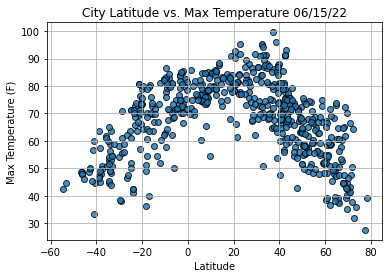

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

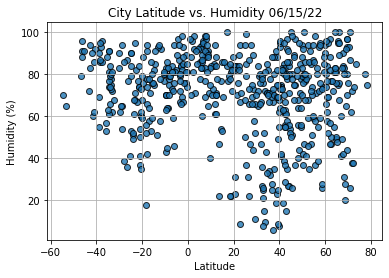

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

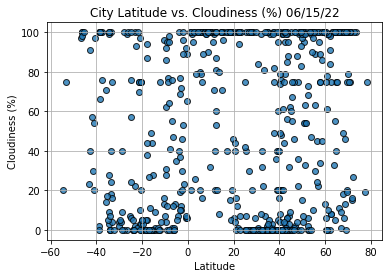

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

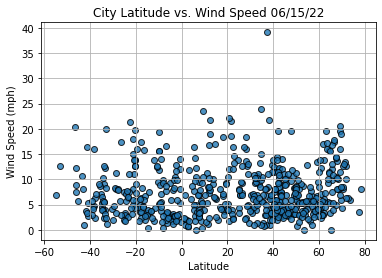

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                     Tasiilaq
Country                        GL
Date          2022-06-16 00:57:48
Lat                       65.6145
Lng                      -37.6368
Max Temp                    37.83
Humidity                       96
Cloudiness                    100
Wind Speed                   9.86
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
572    False
573    False
574    False
575     True
576     True
Name: Lat, Length: 577, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Hilo,US,2022-06-16 00:57:45,19.7297,-155.0900,81.28,88,46,4.00
4,Jamestown,US,2022-06-16 00:57:02,42.0970,-79.2353,81.05,85,100,4.41
5,Tibu,CO,2022-06-16 00:57:46,8.6390,-72.7358,75.72,91,90,1.86
7,Krasnoselkup,RU,2022-06-16 00:57:46,65.7000,82.4667,64.76,75,100,11.97
9,Mehran,IR,2022-06-16 00:57:47,33.1222,46.1646,86.86,15,0,10.60
...,...,...,...,...,...,...,...,...,...
567,Burgeo,CA,2022-06-16 01:13:03,47.6167,-57.6152,53.89,79,88,2.17
568,Saint-Francois,FR,2022-06-16 01:13:03,46.4154,3.9054,65.64,88,0,3.44
570,Jiujiang,CN,2022-06-16 01:13:04,29.7333,115.9833,82.63,70,100,3.67
575,Varkkallai,IN,2022-06-16 01:13:06,8.7341,76.7067,78.58,88,100,9.24


In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Hilo,US,2022-06-16 00:57:45,19.7297,-155.0900,81.28,88,46,4.00
4,Jamestown,US,2022-06-16 00:57:02,42.0970,-79.2353,81.05,85,100,4.41
5,Tibu,CO,2022-06-16 00:57:46,8.6390,-72.7358,75.72,91,90,1.86
7,Krasnoselkup,RU,2022-06-16 00:57:46,65.7000,82.4667,64.76,75,100,11.97
9,Mehran,IR,2022-06-16 00:57:47,33.1222,46.1646,86.86,15,0,10.60


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

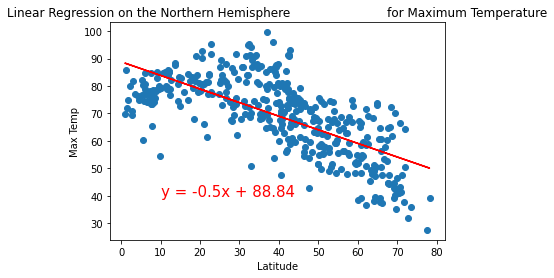

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

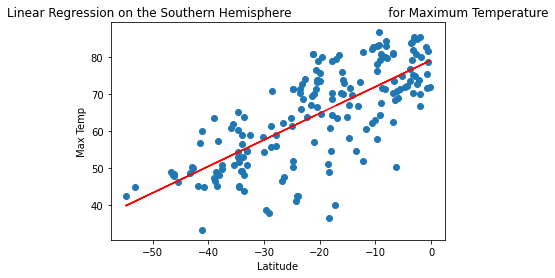

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

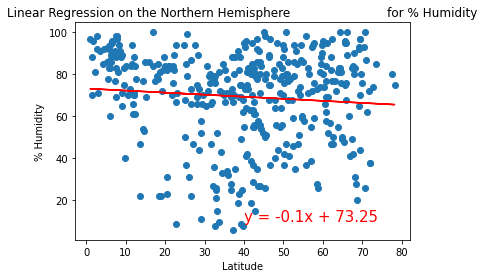

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

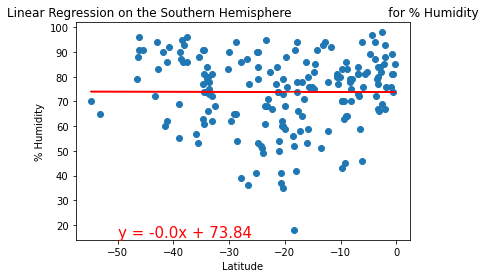

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % cloudiness', '% cloudiness',(-42,35))

KeyError: 'cloudiness'

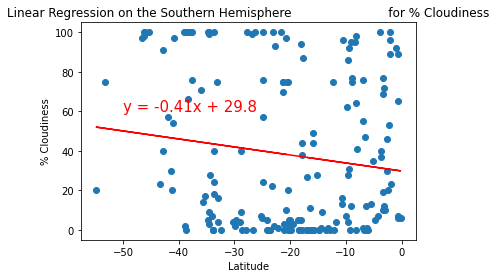

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

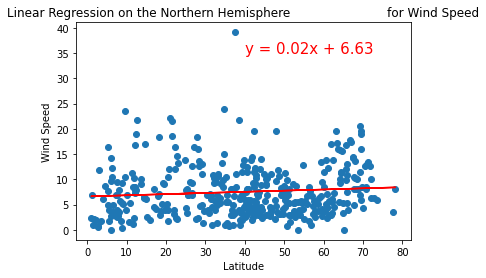

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

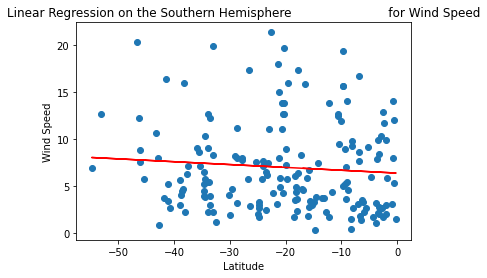

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))